<a href="https://colab.research.google.com/github/NadiaCopello/Spatial_Analysis_of_Peru_Protected_Areas/blob/main/PREGUNTA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install osmnx geopandas shapely requests pyrosm rioxarray rasterio xarray numpy pandas matplotlib statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 7.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pyrobuf-0.9.3-cp311-cp311-linux_x86_64.whl
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 946.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.3 MB/s eta 0:00:00
  Created wheel for pyrosm: filename=pyrosm-0.6.2-cp311-cp311-linux_x86_64.whl size=7689991 sha256=e0d24b66c961af1eed79611b29ebeea6ce6ff4afdae27ae64b3c659bbbe35958
  Stored in directory: /root/.cache

In [ ]:
import requests
import geopandas as gpd
from shapely.geometry import shape

# Definir la consulta Overpass
overpass_url = "http://overpass-api.de/api/interpreter"
query = """
[out:json][timeout:90];
(
  way["boundary"="protected_area"](area:3600020725);
  way["leisure"="nature_reserve"](area:3600020725);
  way["protect_class"](area:3600020725);
  relation["boundary"="protected_area"](area:3600020725);
  relation["leisure"="nature_reserve"](area:3600020725);
  relation["protect_class"](area:3600020725);
);
out body;
>;
out skel qt;
"""

# Ejecutar la consulta
response = requests.get(overpass_url, params={'data': query})
data = response.json()


In [ ]:
import osmnx as ox
import geopandas as gpd

# 1. Defino país
country_name = "Peru"

# 2. Obtengo geometría de Perú
peru_boundary = ox.geocode_to_gdf(country_name).geometry[0]

# 3. Defino etiquetas para la consulta
tags = {
    "boundary": "protected_area",
    "leisure": "nature_reserve",
    "protect_class": True
}

# 4. Descargo datos con OSMnx
gdf = ox.features_from_polygon(peru_boundary, tags=tags)

# 5. Filtro explícitamente por protect_class
valid_classes = ["2", "4", "6"]
gdf_filtered = gdf[gdf["protect_class"].isin(valid_classes)]

# 6. Guardo como GeoPackage
gdf_filtered.to_file("peru_protected_areas.gpkg", driver="GPKG")

print(" Archivo guardado como peru_protected_areas.gpkg")



/usr/local/lib/python3.11/dist-packages/osmnx/_overpass.py:267: UserWarning: This area is 1,086 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


✅ Archivo guardado como peru_protected_areas.gpkg


<Figure size 1000x1000 with 0 Axes>

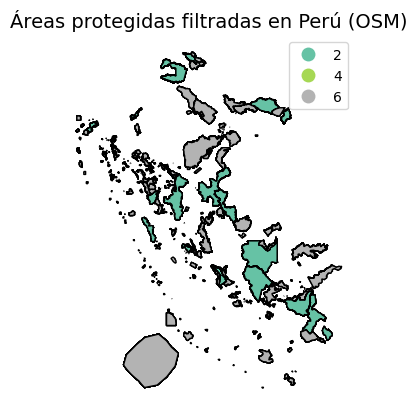

🔎 Frecuencia de cada clase protegida encontrada:
protect_class
6    698
2    162
4      6
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Visualización del mapa
plt.figure(figsize=(10, 10))
gdf_filtered.plot(column="protect_class", legend=True, cmap="Set2", edgecolor="black")
plt.title("Áreas protegidas filtradas en Perú (OSM)", fontsize=14)
plt.axis("off")
plt.show()

# Resumen estadístico de protect_class
print("Frecuencia de cada clase protegida encontrada:")
print(gdf_filtered["protect_class"].value_counts())

